In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/final-participant-data/Final Participant Data Folder"))

# Any results you write to the current directory are saved as output.

['Final_Train.xlsx', 'Final_Test.xlsx', 'Sample_submission.xlsx']


In [2]:
train=pd.read_excel('../input/final-participant-data/Final Participant Data Folder/Final_Train.xlsx')
test=pd.read_excel('../input/final-participant-data/Final Participant Data Folder/Final_Test.xlsx')
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
train.sample(20)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
3865,"MBBS, MS - ENT",33 years experience,91%,"Panchsheel Park, Delhi",ENT Specialist,Nasal and Sinus Allergy Care Otoplasty Hearing...,100
2683,BAMS,16 years experience,NaN,"Dahisar, Mumbai",Ayurveda,NaN,100
2183,"MBBS, Diploma in Otorhinolaryngology (DLO)",15 years experience,NaN,"KPHB, Hyderabad",ENT Specialist,Ear Discharge Treatment Ear Pain Treatment Tin...,300
4464,Doctorate of Medicine in Electro Homoeopathy(M...,18 years experience,NaN,"Laxmi Nagar, Delhi",Homeopath,NaN,500
4619,"BAMS, MD - Ayurveda Medicine",29 years experience,100%,"Vileparle East, Mumbai",Ayurveda,"100% 21 Feedback Vileparle East, Mumbai",500
5089,"BHMS, Doctor of Homeopathic Medicine (HMD), Ce...",22 years experience,NaN,"Andheri West, Mumbai",Homeopath,NaN,100
3207,"MD - General Medicine, BHMS",19 years experience,NaN,"Puzhal, Chennai",Homeopath,NaN,500
5529,"MBBS, MD - General Medicine, Post Graduate Cou...",12 years experience,93%,"Tolichowki, Hyderabad",General Medicine,"93% 11 Feedback Tolichowki, Hyderabad",300
550,"MBBS, MRCP (UK)",19 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
3300,"MD - Ayurveda Medicine, BAMS, Diploma in Famil...",17 years experience,NaN,"Kachiguda, Hyderabad",Ayurveda,NaN,100


In [4]:
# df['main_place']=df['Place'].apply(lambda x : x.split(", ")[-1])
import re
def num_ex(val):
    try:
        t=int(re.sub("[^0-9]",'-',val).split('--')[1])
    except:
        t=0
    return t
def is_nan(x):
    return int(x is np.nan or x != x)
print(train.shape)
train=pd.DataFrame(data=train.loc[train['Place']!='e'],columns=train.columns).reset_index().drop('index',axis=1)
print(train.shape)
big_df = train.append(test)

(5961, 7)
(5960, 7)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
big_df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%


In [6]:
df=big_df.copy()
df['Experience']=df['Experience'].apply(lambda x:int( x.split(" ")[0]))
df['Rating'].fillna('0%',inplace=True)
df['Place'].fillna('Others',inplace=True)
df['isMisc']=df['Miscellaneous_Info'].apply(is_nan)
df['Miscellaneous_Info'].fillna('Others',inplace=True)
df['Rating']=df['Rating'].apply(lambda x:int(x[:-1]))
df['Exp_rate']=df['Experience']+df['Rating']
from sklearn.preprocessing import LabelEncoder
df['City']=df['Place'].apply(lambda x : x.split(", ")[-1])
df['Locality']=df['Place'].apply(lambda x : x.split(", ")[0])
df['City'].fillna("XXX",inplace = True)
df['Locality'].fillna("XXX",inplace = True)
df['isFeedback']=df['Miscellaneous_Info'].apply(lambda x :1 if 'Feedback' in str(x) else 0)
# df['misc_magic_n']=df['Miscellaneous_Info'].apply(num_ex)
df['Qual_len']=df['Qualification'].apply(lambda x : len(x.split(",")))
df['Qual_len2']=df['Qualification'].astype(str).apply(len)

# df['misc_len']=df['Miscellaneous_Info'].apply(lambda x : len(x.split(" ")))

df['Qual_1'] = df['Qualification'].str.split(',').str[0]
df['Qual_2'] = df['Qualification'].str.split(',').str[1]
df['Qual_2_len']=df['Qual_2'].astype(str).apply(len)
df['Qual_3'] = df['Qualification'].str.split(',').str[2]
df['Qual_1'].fillna("XXX",inplace = True)
df['Qual_2'].fillna("YYY",inplace = True)
df['Qual_2_len'].fillna(0,inplace = True)
df['Qual_3'].fillna("ZZZ",inplace = True)


df['Misc'] = df['Miscellaneous_Info'].str.split('%').str[0]
df['Misc_size'] = df['Miscellaneous_Info'].apply(len)
df['Misc_len'] = df['Misc'].str.len()
df.loc[df['Misc_len']>3, 'Misc'] = 0
df['Misc'].fillna(0,inplace = True)
df['Misc'] = df['Misc'].astype(int)
df['Misc_2'] = df['Miscellaneous_Info'].str.split('% ').str[1]
df['Misc_3'] = df['Misc_2'].str.split(' ').str[0]
df['Misc_3'].fillna(0,inplace = True)
df['Misc_3_len'] = df['Misc_3'].str.len()
df.loc[df['Misc_3_len']>3, 'Misc_3'] = 0
df.loc[df['Misc_3']==',', 'Misc_3'] = 0
df['Misc_3'] = df['Misc_3'].astype(int)
df['Misc_2'].fillna('XX',inplace=True)
df['Misc_3_len'].fillna(0,inplace=True)
df['Misc_4'] = df['Misc']*np.log((1+df['Misc_3']))
df['log_exp_rating']=np.log(1+df['Experience'])*np.log((1+df['Rating']))
df['var1']=df['Qual_2_len']/df['Qual_len']
# df['var2']=df['Misc_3']+df['Experience']
df['var3']=np.log(1+df['Rating'])*np.log(1+df['Misc_3'])
# df=pd.get_dummies(df,columns=['Profile','City'],drop_first=True)
df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,isMisc,Exp_rate,City,Locality,isFeedback,Qual_len,Qual_len2,Qual_1,Qual_2,Qual_2_len,Qual_3,Misc,Misc_size,Misc_len,Misc_2,Misc_3,Misc_3_len,Misc_4,log_exp_rating,var1,var3
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100,0,124,Ernakulam,Kakkanad,1,2,21,BHMS,MD - Homeopathy,16,ZZZ,100,36,3,"16 Feedback Kakkanad, Ernakulam",16,2.0,283.321334,14.855500,8.0,13.075621
1,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,0,110,Bangalore,Whitefield,1,2,28,BAMS,MD - Ayurveda Medicine,23,ZZZ,98,37,2,"76 Feedback Whitefield, Bangalore",76,2.0,425.692931,11.786250,11.5,19.960307
2,9,300.0,Others,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0,1,9,Bangalore,Mathikere - BEL,0,2,30,MBBS,MS - Otorhinolaryngology,25,ZZZ,0,6,6,XX,0,0.0,0.000000,0.000000,12.5,0.000000
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0,0,12,Bangalore,Bannerghatta Road,0,2,19,BSc - Zoology,BAMS,5,ZZZ,0,58,58,XX,0,0.0,0.000000,0.000000,2.5,0.000000
4,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100,0,120,Chennai,Keelkattalai,1,1,4,BAMS,YYY,3,ZZZ,100,37,3,"4 Feedback Keelkattalai, Chennai",4,1.0,160.943791,14.050838,3.0,7.427750


In [7]:
# np.log(1+df['Rating'])*np.log(1+df['Misc_3'])
# df['Misc_3']
# Miscellaneous_Info 3981
# Place 948
# Profile 6
# Qualification 1801
# City 9
# Locality 937
# Qual_1 181
# Qual_2 496
# Qual_3 482
# Misc_2 1897
dfcatboost=df.copy()
from sklearn.preprocessing import LabelEncoder
cat_cols=['Profile','City','Locality','Qual_1','Qual_2']
for i in cat_cols:
    l=LabelEncoder()
    df[i]=l.fit_transform(df[i])
df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,isMisc,Exp_rate,City,Locality,isFeedback,Qual_len,Qual_len2,Qual_1,Qual_2,Qual_2_len,Qual_3,Misc,Misc_size,Misc_len,Misc_2,Misc_3,Misc_3_len,Misc_4,log_exp_rating,var1,var3
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",5,"BHMS, MD - Homeopathy",100,0,124,4,324,1,2,21,8,293,16,ZZZ,100,36,3,"16 Feedback Kakkanad, Ernakulam",16,2.0,283.321334,14.855500,8.0,13.075621
1,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",0,"BAMS, MD - Ayurveda Medicine",98,0,110,0,926,1,2,28,5,282,23,ZZZ,98,37,2,"76 Feedback Whitefield, Bangalore",76,2.0,425.692931,11.786250,11.5,19.960307
2,9,300.0,Others,"Mathikere - BEL, Bangalore",3,"MBBS, MS - Otorhinolaryngology",0,1,9,0,494,0,2,30,101,383,25,ZZZ,0,6,6,XX,0,0.0,0.000000,0.000000,12.5,0.000000
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",0,"BSc - Zoology, BAMS",0,0,12,0,74,0,2,19,14,10,5,ZZZ,0,58,58,XX,0,0.0,0.000000,0.000000,2.5,0.000000
4,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",0,BAMS,100,0,120,1,367,1,1,4,5,495,3,ZZZ,100,37,3,"4 Feedback Keelkattalai, Chennai",4,1.0,160.943791,14.050838,3.0,7.427750


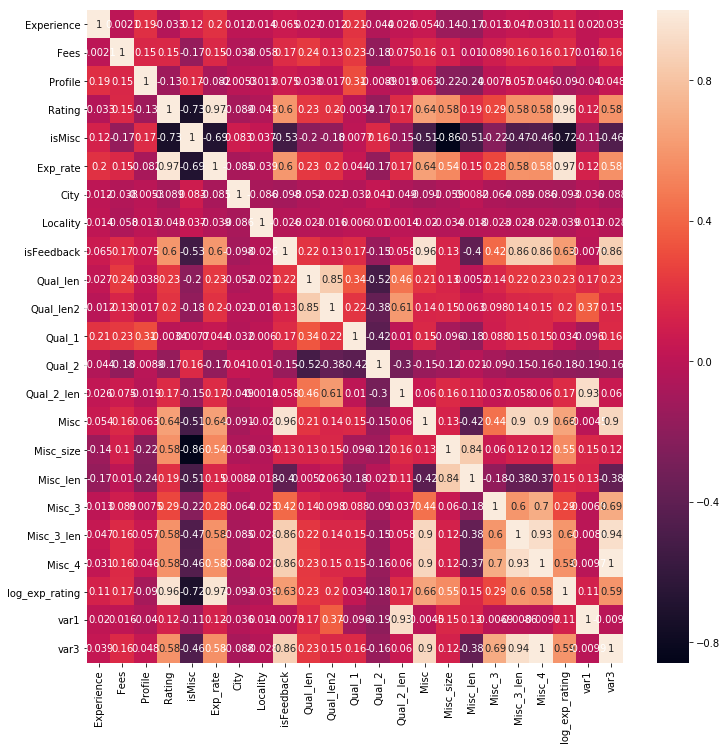

In [8]:
# big_df['Qual_1'] = big_df['Qualification'].str.split(',').str[0]
# big_df['Qual_2'] = big_df['Qualification'].str.split(',').str[1]
# big_df['Qual_3'] = big_df['Qualification'].str.split(',').str[2]
# big_df['Qual_1'].fillna("XXX",inplace = True)
# big_df['Qual_2'].fillna("XXX",inplace = True)
# big_df['Qual_3'].fillna("XXX",inplace = True)
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [9]:
for i in df.columns:
    if df[i].dtype!='object':
#         sns.jointplot(i,'Fees',df)
        pass
    else:
        print(i,df[i].nunique())

Miscellaneous_Info 3981
Place 948
Qualification 1801
Qual_3 482
Misc_2 1897


In [10]:
# big_df['years_exp'] = big_df['Experience'].str.slice(stop=2).astype(int)
# big_df['Rating'].fillna('0%',inplace = True)
# big_df['Rating'] = big_df['Rating'].str.slice(stop=-1).astype(int)
# big_df['City'] = big_df['Place'].str.split(',').str[1]
# big_df['Locality'] = big_df['Place'].str.split(',').str[0]
# big_df['City'].fillna("XXX",inplace = True)
# big_df['Locality'].fillna("XXX",inplace = True)


# big_df['Misc'] = big_df['Miscellaneous_Info'].str.split('%').str[0]
# big_df['Misc_len'] = big_df['Misc'].str.len()
# big_df.loc[big_df['Misc_len']>3, 'Misc'] = 0
# big_df['Misc'].fillna(0,inplace = True)
# big_df['Misc'] = big_df['Misc'].astype(int)
# big_df['Misc_2'] = big_df['Miscellaneous_Info'].str.split('% ').str[1]
# big_df['Misc_3'] = big_df['Misc_2'].str.split(' ').str[0]
# big_df['Misc_3'].fillna(0,inplace = True)
# big_df['Misc_3_len'] = big_df['Misc_3'].str.len()
# big_df.loc[big_df['Misc_3_len']>3, 'Misc_3'] = 0
# big_df.loc[big_df['Misc_3']==',', 'Misc_3'] = 0
# big_df['Misc_3'] = big_df['Misc_3'].astype(int)
df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,isMisc,Exp_rate,City,Locality,isFeedback,Qual_len,Qual_len2,Qual_1,Qual_2,Qual_2_len,Qual_3,Misc,Misc_size,Misc_len,Misc_2,Misc_3,Misc_3_len,Misc_4,log_exp_rating,var1,var3
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",5,"BHMS, MD - Homeopathy",100,0,124,4,324,1,2,21,8,293,16,ZZZ,100,36,3,"16 Feedback Kakkanad, Ernakulam",16,2.0,283.321334,14.855500,8.0,13.075621
1,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",0,"BAMS, MD - Ayurveda Medicine",98,0,110,0,926,1,2,28,5,282,23,ZZZ,98,37,2,"76 Feedback Whitefield, Bangalore",76,2.0,425.692931,11.786250,11.5,19.960307
2,9,300.0,Others,"Mathikere - BEL, Bangalore",3,"MBBS, MS - Otorhinolaryngology",0,1,9,0,494,0,2,30,101,383,25,ZZZ,0,6,6,XX,0,0.0,0.000000,0.000000,12.5,0.000000
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",0,"BSc - Zoology, BAMS",0,0,12,0,74,0,2,19,14,10,5,ZZZ,0,58,58,XX,0,0.0,0.000000,0.000000,2.5,0.000000
4,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",0,BAMS,100,0,120,1,367,1,1,4,5,495,3,ZZZ,100,37,3,"4 Feedback Keelkattalai, Chennai",4,1.0,160.943791,14.050838,3.0,7.427750


In [11]:
df.tail()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,isMisc,Exp_rate,City,Locality,isFeedback,Qual_len,Qual_len2,Qual_1,Qual_2,Qual_2_len,Qual_3,Misc,Misc_size,Misc_len,Misc_2,Misc_3,Misc_3_len,Misc_4,log_exp_rating,var1,var3
1982,10,NaN,Others,"Basavanagudi, Bangalore",0,"BAMS, Doctor of Medicine",0,1,10,0,76,0,2,24,5,180,19,ZZZ,0,6,6,XX,0,0.0,0.0,0.00000,9.500000,0.0
1983,4,NaN,Others,"Choolai, Chennai",2,"MD - Dermatology , Venereology & Leprosy, MBBS",0,1,4,1,135,0,3,46,111,491,22,MBBS,0,6,6,XX,0,0.0,0.0,0.00000,7.333333,0.0
1984,9,NaN,Others,"Porur, Chennai",4,"MBBS, MD / MS - Obstetrics & Gynaecology",0,1,9,1,659,0,2,40,101,323,35,ZZZ,0,6,6,XX,0,0.0,0.0,0.00000,17.500000,0.0
1985,12,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",1,BDS,98,0,110,0,34,0,1,3,6,495,3,ZZZ,0,76,76,XX,0,0.0,0.0,11.78625,3.000000,0.0
1986,8,NaN,"1 Feedback Pallikaranai, Chennai ₹500","Pallikaranai, Chennai",2,"MBBS, MD - Dermatology , Venereology & Leprosy",0,0,8,1,608,1,3,46,101,287,18,Venereology & Leprosy,0,37,37,XX,0,0.0,0.0,0.00000,6.000000,0.0


In [12]:
big_df = df.drop(['Miscellaneous_Info','Place','Qualification','Misc_2','Qual_3'], axis=1)
df_train = big_df[0:5960]
df_test = big_df[5960:]
df_test = df_test.drop(['Fees'], axis =1)





In [13]:
df_train.tail()

,Experience,Fees,Profile,Rating,isMisc,Exp_rate,City,Locality,isFeedback,Qual_len,Qual_len2,Qual_1,Qual_2,Qual_2_len,Misc,Misc_size,Misc_len,Misc_3,Misc_3_len,Misc_4,log_exp_rating,var1,var3
5955,19,300.0,3,98,0,117,0,76,1,2,14,101,376,9,98,39,2,45,2.0,375.206857,13.765749,4.5,17.593066
5956,33,100.0,4,0,1,33,1,583,0,1,4,101,495,3,0,6,6,0,0.0,0.000000,0.000000,3.0,0.000000
5957,41,600.0,4,97,0,138,3,233,1,1,4,101,495,3,97,45,2,11,2.0,241.035945,17.137094,3.0,11.393216
5958,15,100.0,4,90,0,105,6,909,0,2,27,101,290,22,0,79,79,0,0.0,0.000000,12.506758,11.0,0.000000
5959,17,200.0,1,100,0,117,3,651,0,2,23,6,337,19,0,66,66,0,0.0,0.000000,13.339414,9.5,0.000000


In [14]:
df_test.head()

,Experience,Profile,Rating,isMisc,Exp_rate,City,Locality,isFeedback,Qual_len,Qual_len2,Qual_1,Qual_2,Qual_2_len,Misc,Misc_size,Misc_len,Misc_3,Misc_3_len,Misc_4,log_exp_rating,var1,var3
0,35,4,0,1,35,6,217,0,1,4,101,495,3,0,6,6,0,0.0,0.000000,0.000000,3.0,0.000000
1,31,3,0,1,31,5,924,0,2,42,101,159,37,0,6,6,0,0.0,0.000000,0.000000,18.5,0.000000
2,40,2,70,0,110,1,314,1,2,10,101,65,5,70,32,2,4,1.0,112.660654,15.829769,2.5,6.860519
3,0,0,0,1,0,3,573,0,1,4,5,495,3,0,6,6,0,0.0,0.000000,0.000000,3.0,0.000000
4,16,1,100,0,116,0,340,0,2,47,6,328,43,0,70,70,0,0.0,0.000000,13.075621,21.5,0.000000


In [15]:
# df_test_merge_1 = df_test[['Qual_1','Qual_1_code']].drop_duplicates()
# df_test_merge_2 = df_test[['Qual_2','Qual_2_code']].drop_duplicates()
# df_test_merge_3 = df_test[['Qual_3','Qual_3_code']].drop_duplicates()
# df_test_merge_4 = df_test[['Profile','Profile_code']].drop_duplicates()
# df_test_merge_5 = df_test[['City','City_code']].drop_duplicates()
# df_test_merge_6 = df_test[['Locality','Locality_code']].drop_duplicates()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,mean_squared_log_error
X=df_train.drop(['Fees'],axis=1)
y=np.log1p(df_train['Fees'])
# y=train['Fees']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994)

categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([], dtype=int64)

In [16]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,RidgeCV,BayesianRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_log_error
# def sigmoid(x, derivative=False):
#     sigm = 1. / (1. + np.exp(-x))
#     if derivative:
#         return sigm * (1. - sigm)
#     return sigm
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(real, predicted):
    
    real=np.expm1(real)
    predicted=np.expm1(predicted)
#     print(real,predicted)
#     real=np.exp(real)
#     predicted=np.exp(predicted)
#     sum=0.0
#     for x in range(0,len(predicted)):
#         if predicted[x]<0 or real[x]<0: #check for negative values
#             continue
#         p = np.log(predicted[x]+1)
#         r = np.log(real[x]+1)
#         sum = sum + (p - r)**2
#     return (sum/len(predicted))**0.5
    return np.sqrt(mean_squared_log_error(real,predicted))
    

def rmsle_lgb(labels, preds):
    return 'rmsle', rmsle(preds,labels), False

# print(rmsle(np.expm1(y_val.values),np.expm1(p)))

# print(np.sqrt(mean_squared_log_error(y_val,p)))

In [17]:
from lightgbm import LGBMRegressor
m=LGBMRegressor(n_estimators=1000,verbose=100)
# m=RidgeCV(cv=4)
m.fit(X,y,eval_metric=rmsle_lgb, verbose=100,categorical_feature=cat_cols)
lgbmp=m.predict(X)
# m=Rid
# print(np.sqrt(mean_squared_log_error(np.expm1(y_val.values),np.expm1(p))))
# print(np.sqrt(mean_squared_log_error(y_val.values,p)))
# print(rmsle_lgb(y_val.values,lgbmp))

/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [18]:
lgbmp

array([4.64185979, 5.85443833, 5.64953623, ..., 6.36392252, 4.56381165,
       5.40583784])

In [19]:
print(X_train.shape)
X_train.tail()

(4470, 22)


,Experience,Profile,Rating,isMisc,Exp_rate,City,Locality,isFeedback,Qual_len,Qual_len2,Qual_1,Qual_2,Qual_2_len,Misc,Misc_size,Misc_len,Misc_3,Misc_3_len,Misc_4,log_exp_rating,var1,var3
4432,10,1,99,0,109,0,398,0,1,3,6,495,3,0,78,78,0,0.0,0.0,11.042716,3.000000,0.0
203,8,0,0,1,8,8,618,0,1,4,5,495,3,0,6,6,0,0.0,0.0,0.000000,3.000000,0.0
2082,12,5,0,1,12,5,581,0,1,4,8,495,3,0,6,6,0,0.0,0.0,0.000000,3.000000,0.0
3427,29,4,0,1,29,1,852,0,3,55,101,286,17,0,6,6,0,0.0,0.0,0.000000,5.666667,0.0
2486,2,1,100,0,102,0,676,0,1,3,6,495,3,0,57,57,0,0.0,0.0,5.070228,3.000000,0.0


In [20]:
# from lightgbm import LGBMRegressor
# from sklearn.neural_network import MLPRegressor
# m=MLPRegressor(hidden_layer_sizes=(100,100,50))
# # m=RidgeCV(cv=4)
# m.fit(X_train,y_train)
# p=m.predict(X_val)
# # m=Rid
# print(np.sqrt(mean_squared_log_error(np.expm1(y_val.values),np.expm1(p))))
# # print(np.sqrt(mean_squared_log_error(y_val.values,p)))
# # print(rmsle_lgb(y_val.values,lgbmp))

In [21]:

errlgb=[]
y_pred_totlgb=[]
# low=99999
# jj=[]
# X=X.tocsr()
i=0
from sklearn.model_selection import KFold,StratifiedKFold
fold=KFold(n_splits=27,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X):
#     print(train_index, test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
#     print(X_train,X_test)
    y_train, y_test = y[train_index], y[test_index]
    lgbm_params = {'n_estimators': 2000, 
#                    'learning_rate': 0.05, 
#                    'nthread': 3, # Updated from nthread
#           'num_leaves': 64,
#                    'reg_alpha': 0.5,
#           'reg_lambda': 5,
#                    'boosting_type': 'gbdt',
#                    'objective':"regression",
#                    'max_depth': 5,
#                'num_leaves': 50, 
#                    'subsample': 0.6, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.6,
#                    'subsample': 0.9,
#                    'colsample_bytree': 0.8,
#                'min_child_samples': 50,
                   'n_jobs': -1}
    rf=LGBMRegressor(**lgbm_params)
#     rf=CatBoostRegressor(n_estimators=2000,eval_metric='RMSE',learning_rate=0.05,max_depth=5)
#     rf=XGBRegressor(**lgbm_params)
    
    
    rf.fit(X_train,y_train,eval_set=[(X_test, y_test.values)],
         eval_metric=rmsle_lgb,
#            eval_metric='rmse',
           categorical_feature=cat_cols,
         verbose=200
         , early_stopping_rounds=100
          )
#     print('predict')
    pr=rf.predict(X_test)
#     print(1)
    print("errlgb: ",np.sqrt(mean_squared_log_error(np.expm1(y_test.values),np.expm1(pr))))
    
    errlgb.append(rmsle_lgb(y_test.values,pr)[1])
    p = rf.predict(df_test)
    print(p.shape)
#     s=pd.DataFrame({'Fees':np.expm1(p)})
#     s.to_excel('pred_docMH_5folds'+str(i)+'.xlsx',index=False)
    i+=1
#     p = rf.predict(pcft)
#     if low>np.sqrt(mean_squared_log_error(np.expm1(y_test.values),np.expm1(pr))):
#         low=np.sqrt(mean_squared_log_error(np.expm1(y_test.values),np.expm1(pr)))
#         jj=p
    y_pred_totlgb.append(p)

Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	valid_0's l2: 0.350503	valid_0's rmsle: 0.592033
Early stopping, best iteration is:
[102]	valid_0's l2: 0.347081	valid_0's rmsle: 0.589135
errlgb:  0.5891353972859117
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	valid_0's l2: 0.335949	valid_0's rmsle: 0.579611
Early stopping, best iteration is:
[143]	valid_0's l2: 0.332164	valid_0's rmsle: 0.576337
errlgb:  0.5763366465206254
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[27]	valid_0's l2: 0.339014	valid_0's rmsle: 0.582249
errlgb:  0.5822489018005949
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	valid_0's l2: 0.305955	valid_0's rmsle: 0.553132
Early stopping, best iteration is:
[248]	valid_0's l2: 0.304608	valid_0's rmsle: 0.551913
errlgb:  0.5519132145660807
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[25]	valid_0's l2: 0.382932	valid_0's rmsle: 0.618815
errlgb:  0.6188152303016986
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[17]	valid_0's l2: 0.3448	valid_0's rmsle: 0.587196
errlgb:  0.5871964246250017
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[29]	valid_0's l2: 0.359673	valid_0's rmsle: 0.599727
errlgb:  0.5997274697044858
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	valid_0's l2: 0.283301	valid_0's rmsle: 0.53226
Early stopping, best iteration is:
[180]	valid_0's l2: 0.277761	valid_0's rmsle: 0.52703
errlgb:  0.5270303640315218
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[34]	valid_0's l2: 0.312373	valid_0's rmsle: 0.558903
errlgb:  0.5589034813308721
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[73]	valid_0's l2: 0.361133	valid_0's rmsle: 0.600944
errlgb:  0.6009437190177767
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[53]	valid_0's l2: 0.284481	valid_0's rmsle: 0.533367
errlgb:  0.533367203147504
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[61]	valid_0's l2: 0.338788	valid_0's rmsle: 0.582055
errlgb:  0.5820547547376184
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[43]	valid_0's l2: 0.296697	valid_0's rmsle: 0.544699
errlgb:  0.5446989322272443
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[38]	valid_0's l2: 0.352311	valid_0's rmsle: 0.593558
errlgb:  0.5935576372986786
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[29]	valid_0's l2: 0.301811	valid_0's rmsle: 0.549373
errlgb:  0.5493732616184742
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[43]	valid_0's l2: 0.310615	valid_0's rmsle: 0.557328
errlgb:  0.5573282938136542
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	valid_0's l2: 0.319899	valid_0's rmsle: 0.565596
Early stopping, best iteration is:
[213]	valid_0's l2: 0.318621	valid_0's rmsle: 0.564465
errlgb:  0.5644647697475763
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	valid_0's l2: 0.313886	valid_0's rmsle: 0.560255
Early stopping, best iteration is:
[172]	valid_0's l2: 0.308566	valid_0's rmsle: 0.555487
errlgb:  0.5554873854569387
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[57]	valid_0's l2: 0.370609	valid_0's rmsle: 0.608777
errlgb:  0.6087765528089297
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[78]	valid_0's l2: 0.316623	valid_0's rmsle: 0.562692
errlgb:  0.5626924892701014
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[77]	valid_0's l2: 0.351678	valid_0's rmsle: 0.593024
errlgb:  0.5930242813056757
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[77]	valid_0's l2: 0.341133	valid_0's rmsle: 0.584065
errlgb:  0.5840654474062466
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[42]	valid_0's l2: 0.3642	valid_0's rmsle: 0.60349
errlgb:  0.6034896936602049
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[79]	valid_0's l2: 0.318061	valid_0's rmsle: 0.563969
errlgb:  0.5639692774326317
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[56]	valid_0's l2: 0.341614	valid_0's rmsle: 0.584477
errlgb:  0.5844773072582272
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[57]	valid_0's l2: 0.287021	valid_0's rmsle: 0.535744
errlgb:  0.5357437999173186
(1987,)
Training until validation scores don't improve for 100 rounds.


/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/opt/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Locality', 'Profile', 'Qual_1', 'Qual_2']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[200]	valid_0's l2: 0.304796	valid_0's rmsle: 0.552083
Early stopping, best iteration is:
[160]	valid_0's l2: 0.301746	valid_0's rmsle: 0.549314
errlgb:  0.5493138717390369
(1987,)


In [22]:
y_pred_totlgb[0].shape
print(np.mean(errlgb,0))

0.572523548445579


In [23]:
# from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor
# from xgboost import XGBRegressor
# errxgb=[]
# y_pred_totxgb=[]
# from sklearn.model_selection import KFold,StratifiedKFold
# fold=KFold(n_splits=25,shuffle=True,random_state=1994)
# for train_index, test_index in fold.split(X,y):
# #     print(1)
#     X_train, X_test = X.loc[train_index], X.loc[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     lgbm_params = {'n_estimators': 1000, 
# #                    'learning_rate': 0.1, 
# #                    'nthread': 3, # Updated from nthread
# #           'num_leaves': 64,
# #                    'reg_alpha': 0.5,
# #           'reg_lambda': 5,
# #                    'boosting_type': 'gbdt',
# #                    'objective':"regression",
#                    'max_depth': 5,
# #                'num_leaves': 50, 
# #                    'subsample': 0.6, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.6,
# #                    'subsample': 0.9,
# #                    'colsample_bytree': 0.8,
# #                'min_child_samples': 50,
#                    'n_jobs': -1}
# #     rf=LGBMRegressor(**lgbm_params)
# #     rf=CatBoostRegressor(n_estimators=1000,eval_metric='RMSE')
#     rf=XGBRegressor(**lgbm_params)
# #     rf=XGBRegressor()
# #     rf=GradientBoostingRegressor(n_estimators=200)
# #     rf=BaggingRegressor(base_estimator=GradientBoostingRegressor(n_estimators=200))
#     rf.fit(X_train,y_train,eval_set=[(X_test, y_test.values)],
# #          eval_metric=rmsle_lgb,
#            eval_metric='rmse',
#          verbose=100, early_stopping_rounds=50)
#     prx=rf.predict(X_test)
#     print("err: ",rmsle(y_test.values,prx))
#     errxgb.append(rmsle(y_test.values,prx))
#     p = rf.predict(df_test)
#     y_pred_totxgb.append(p)

In [24]:
# np.mean(errxgb,0)

In [25]:
# m=XGBRegressor(n_estimators=1500)
# # m=RidgeCV(cv=4)
# m.fit(X,y,eval_set=[(X, y.values)],eval_metric='rmse', early_stopping_rounds=100,verbose=100)
# xgbp=m.predict(X)

In [26]:
big_dfcb = dfcatboost.drop(['Miscellaneous_Info','Place','Qualification','Misc_2','Qual_3'], axis=1)
df_train = big_dfcb[0:5960]
df_test = big_dfcb[5960:]
df_test = df_test.drop(['Fees'], axis =1)

X=df_train.drop(['Fees'],axis=1)
y=np.log1p(df_train['Fees'])
# y=train['Fees']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994)

categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([ 1,  5,  6, 10, 11])

In [27]:
from catboost import CatBoostRegressor
rf=CatBoostRegressor(n_estimators=2000,eval_metric='RMSE',learning_rate=0.05,max_depth=5)
#     rf=XGBRegressor(**lgbm_params)


rf.fit(X,y,
#          eval_metric=rmsle_lgb,
#            eval_metric='rmse',
       cat_features=categorical_features_indices,
     verbose=200
#          , early_stopping_rounds=100,use_best_model=True
      )
#     print('predict')
cbpr=rf.predict(X)
#     print(1)
# print("err: ",np.sqrt(mean_squared_log_error(np.expm1(y_val.values),np.expm1(cbpr))))

# err.append(rmsle_lgb(y_val.values,pr)[1])
# p = rf.predict(df_test)

0:	learn: 5.2924269	total: 65.8ms	remaining: 2m 11s
200:	learn: 0.5755980	total: 1.7s	remaining: 15.2s
400:	learn: 0.5600669	total: 3.51s	remaining: 14s
600:	learn: 0.5525190	total: 5.35s	remaining: 12.4s
800:	learn: 0.5475900	total: 7.12s	remaining: 10.7s
1000:	learn: 0.5434290	total: 8.95s	remaining: 8.93s
1200:	learn: 0.5399911	total: 10.8s	remaining: 7.17s
1400:	learn: 0.5365264	total: 12.6s	remaining: 5.37s
1600:	learn: 0.5334096	total: 14.4s	remaining: 3.58s
1800:	learn: 0.5307891	total: 16.1s	remaining: 1.78s
1999:	learn: 0.5280492	total: 18.1s	remaining: 0us


In [28]:
# rf.fit(X,y,cat_features=categorical_features_indices,eval_set=(X, y),
#         plot=False,early_stopping_rounds=100,use_best_model=True,verbose=200)
# y_predd=rf.predict(df_test)

# pr
# print(rmsle_lgb(y_val.values,(p+pr)/2))

In [29]:
# y_predd

In [30]:

err=[]
y_pred_tot=[]
# low=99999
# jj=[]
# X=X.tocsr()
i=0
from sklearn.model_selection import KFold,StratifiedKFold
fold=KFold(n_splits=27,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X):
#     print(train_index, test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
#     print(X_train,X_test)
    y_train, y_test = y[train_index], y[test_index]
    lgbm_params = {'n_estimators': 1500, 
                   'learning_rate': 0.03, 
#                    'nthread': 3, # Updated from nthread
#           'num_leaves': 64,
#                    'reg_alpha': 0.5,
#           'reg_lambda': 5,
#                    'boosting_type': 'gbdt',
#                    'objective':"regression",
                   'max_depth': 9,
#                'num_leaves': 50, 
#                    'subsample': 0.6, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.6,
#                    'subsample': 0.9,
#                    'colsample_bytree': 0.8,
#                'min_child_samples': 50,
                   'n_jobs': -1}
#     rf=LGBMRegressor(**lgbm_params)
    rf=CatBoostRegressor(n_estimators=2000,eval_metric='RMSE',learning_rate=0.05,max_depth=5)
#     rf=XGBRegressor(**lgbm_params)
    
    
    rf.fit(X_train,y_train,eval_set=[(X_test, y_test.values)],
#          eval_metric=rmsle_lgb,
#            eval_metric='rmse',
           cat_features=categorical_features_indices,
         verbose=200
#          , early_stopping_rounds=100,use_best_model=True
          )
#     print('predict')
    prc=rf.predict(X_test)
#     print(1)
    print("err: ",np.sqrt(mean_squared_log_error(np.expm1(y_test.values),np.expm1(prc))))
    
    err.append(rmsle_lgb(y_test.values,prc)[1])
    p = rf.predict(df_test)
#     s=pd.DataFrame({'Fees':np.expm1(p)})
#     s.to_excel('pred_docMH_5folds'+str(i)+'.xlsx',index=False)
    i+=1
#     p = rf.predict(pcft)
#     if low>np.sqrt(mean_squared_log_error(np.expm1(y_test.values),np.expm1(pr))):
#         low=np.sqrt(mean_squared_log_error(np.expm1(y_test.values),np.expm1(pr)))
#         jj=p
    y_pred_tot.append(p)

0:	learn: 5.2934893	test: 5.2678334	best: 5.2678334 (0)	total: 11.3ms	remaining: 22.7s
200:	learn: 0.5744655	test: 0.5990267	best: 0.5990267 (200)	total: 1.72s	remaining: 15.4s
400:	learn: 0.5596242	test: 0.5966942	best: 0.5961654 (377)	total: 3.52s	remaining: 14s
600:	learn: 0.5500074	test: 0.5921237	best: 0.5921223 (598)	total: 5.31s	remaining: 12.4s
800:	learn: 0.5446990	test: 0.5900679	best: 0.5899792 (795)	total: 7.16s	remaining: 10.7s
1000:	learn: 0.5400429	test: 0.5887169	best: 0.5887137 (999)	total: 8.97s	remaining: 8.96s
1200:	learn: 0.5363147	test: 0.5883340	best: 0.5879585 (1109)	total: 10.8s	remaining: 7.2s
1400:	learn: 0.5334947	test: 0.5873166	best: 0.5872653 (1379)	total: 12.7s	remaining: 5.42s
1600:	learn: 0.5309410	test: 0.5870022	best: 0.5869984 (1594)	total: 14.5s	remaining: 3.62s
1800:	learn: 0.5281329	test: 0.5853884	best: 0.5853429 (1797)	total: 16.4s	remaining: 1.81s
1999:	learn: 0.5262844	test: 0.5856772	best: 0.5853429 (1797)	total: 18.2s	remaining: 0us

bestTe

In [31]:
# np.where(X_train.dtype==np.object)
print(np.mean(err,0))
print(np.mean(errlgb,0))
# print(np.mean(errxgb,0))

0.5665182954117529
0.572523548445579


In [32]:
# sorted(zip(rf.feature_importances_,X_train),reverse=True)


In [33]:
# X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994)
# from lightgbm import LGBMRegressor
# m=LGBMRegressor(n_estimators=1000)
# # m=RidgeCV(cv=4)
# m.fit(X_train,y_train,eval_set=[(X_val, y_val.values)],eval_metric=rmsle_lgb, early_stopping_rounds=100,categorical_feature="1,4,5,9,10,11")
# p=m.predict(X_val)
# # m=Rid
# # print(np.sqrt(mean_squared_log_error(np.expm1(y_val.values),np.expm1(p))))
# # print(np.sqrt(mean_squared_log_error(y_val.values,p)))
# print(rmsle_lgb(y_val.values,p))
np.mean(y_pred_totlgb,0)

array([5.22104274, 5.48485077, 5.64255202, ..., 5.40971089, 5.20155992,
       6.06429937])

In [34]:


s=pd.read_excel('../input/final-participant-data/Final Participant Data Folder/Sample_submission.xlsx')
s.head()


,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


In [35]:
# xgbp
# main_df=pd.DataFrame({'lgb':lgbmp,'cb':cbpr,'p':y})
# main_df.head()
df_train['lgb']=np.expm1(lgbmp)
df_train['cb']=np.expm1(cbpr)
main_df=df_train.copy()
XX,yy=main_df.drop('Fees',axis=1),np.log1p(main_df.Fees)
print(XX.shape,yy.shape)
main_df.head()

(5960, 24) (5960,)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Experience,Fees,Profile,Rating,isMisc,Exp_rate,City,Locality,isFeedback,Qual_len,Qual_len2,Qual_1,Qual_2,Qual_2_len,Misc,Misc_size,Misc_len,Misc_3,Misc_3_len,Misc_4,log_exp_rating,var1,var3,lgb,cb
0,24,100.0,Homeopath,100,0,124,Ernakulam,Kakkanad,1,2,21,BHMS,MD - Homeopathy,16,100,36,3,16,2.0,283.321334,14.855500,8.0,13.075621,102.737098,191.540345
1,12,350.0,Ayurveda,98,0,110,Bangalore,Whitefield,1,2,28,BAMS,MD - Ayurveda Medicine,23,98,37,2,76,2.0,425.692931,11.786250,11.5,19.960307,347.778945,343.059844
2,9,300.0,ENT Specialist,0,1,9,Bangalore,Mathikere - BEL,0,2,30,MBBS,MS - Otorhinolaryngology,25,0,6,6,0,0.0,0.000000,0.000000,12.5,0.000000,283.159650,399.705550
3,12,250.0,Ayurveda,0,0,12,Bangalore,Bannerghatta Road,0,2,19,BSc - Zoology,BAMS,5,0,58,58,0,0.0,0.000000,0.000000,2.5,0.000000,259.098050,248.809435
4,20,250.0,Ayurveda,100,0,120,Chennai,Keelkattalai,1,1,4,BAMS,YYY,3,100,37,3,4,1.0,160.943791,14.050838,3.0,7.427750,262.935340,203.849077


In [36]:
# (np.mean(y_pred_tot,0)+np.mean(y_pred_totlgb,0)+np.mean(y_pred_totxgb,0))/3
df_test['lgb']=np.expm1(np.mean(y_pred_totlgb,0))
df_test['cb']=np.expm1(np.mean(y_pred_tot,0))
predict_df=df_test.copy()
# predict_df=pd.DataFrame({'lgb':np.mean(y_pred_totlgb,0),'cb':np.mean(y_pred_tot,0)})
predict_df.head()

,Experience,Profile,Rating,isMisc,Exp_rate,City,Locality,isFeedback,Qual_len,Qual_len2,Qual_1,Qual_2,Qual_2_len,Misc,Misc_size,Misc_len,Misc_3,Misc_3_len,Misc_4,log_exp_rating,var1,var3,lgb,cb
0,35,General Medicine,0,1,35,Mumbai,Ghatkopar East,0,1,4,MBBS,YYY,3,0,6,6,0,0.0,0.000000,0.000000,3.0,0.000000,184.127123,215.414323
1,31,ENT Specialist,0,1,31,Hyderabad,West Marredpally,0,2,42,MBBS,Diploma in Otorhinolaryngology (DLO),37,0,6,6,0,0.0,0.000000,0.000000,18.5,0.000000,240.012975,317.818264
2,40,Dermatologists,70,0,110,Chennai,KK Nagar,1,2,10,MBBS,DDVL,5,70,32,2,4,1.0,112.660654,15.829769,2.5,6.860519,281.181934,297.517321
3,0,Ayurveda,0,1,0,Delhi,New Ashok Nagar,0,1,4,BAMS,YYY,3,0,6,6,0,0.0,0.000000,0.000000,3.0,0.000000,172.373702,170.791289
4,16,Dentist,100,0,116,Bangalore,Kanakpura Road,0,2,47,BDS,MDS - Conservative Dentistry & Endodontics,43,0,70,70,0,0.0,0.000000,13.075621,21.5,0.000000,283.481208,294.597824


In [37]:

errmain=[]
y_pred_main=[]
# low=99999
# jj=[]
# X=X.tocsr()
i=0
from sklearn.model_selection import KFold,StratifiedKFold
fold=KFold(n_splits=27,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(XX):
#     print(train_index, test_index)
    X_train, X_test = XX.loc[train_index], XX.loc[test_index]
#     print(X_train,X_test)
    y_train, y_test = yy[train_index], yy[test_index]
    lgbm_params = {'n_estimators': 2000, 
                   'n_jobs': -1}
    rf=CatBoostRegressor(n_estimators=2000,eval_metric='RMSE',learning_rate=0.05,max_depth=5)
    rf.fit(X_train,y_train,eval_set=[(X_test, y_test.values)],
         verbose=200,cat_features=categorical_features_indices
#          , early_stopping_rounds=100
          )
    pr=rf.predict(X_test)
    print("errmain: ",np.sqrt(mean_squared_log_error(np.expm1(y_test.values),np.expm1(pr))))
    
    errmain.append(rmsle_lgb(y_test.values,pr)[1])
    pp = rf.predict(predict_df)
    print(pp.shape)
    y_pred_main.append(pp)

0:	learn: 5.2917984	test: 5.2678530	best: 5.2678530 (0)	total: 11.4ms	remaining: 22.8s
200:	learn: 0.1973907	test: 0.2364691	best: 0.2364209 (189)	total: 1.85s	remaining: 16.5s
400:	learn: 0.1900637	test: 0.2324107	best: 0.2324065 (395)	total: 3.71s	remaining: 14.8s
600:	learn: 0.1874585	test: 0.2311219	best: 0.2310473 (551)	total: 5.54s	remaining: 12.9s
800:	learn: 0.1854117	test: 0.2292910	best: 0.2292505 (785)	total: 7.29s	remaining: 10.9s
1000:	learn: 0.1836457	test: 0.2287228	best: 0.2286430 (880)	total: 9.05s	remaining: 9.04s
1200:	learn: 0.1825777	test: 0.2283284	best: 0.2283284 (1200)	total: 10.8s	remaining: 7.2s
1400:	learn: 0.1815137	test: 0.2278157	best: 0.2278115 (1382)	total: 12.6s	remaining: 5.4s
1600:	learn: 0.1807366	test: 0.2275520	best: 0.2274975 (1580)	total: 14.4s	remaining: 3.6s
1800:	learn: 0.1799706	test: 0.2272826	best: 0.2272334 (1797)	total: 16.2s	remaining: 1.79s
1999:	learn: 0.1791023	test: 0.2268110	best: 0.2266930 (1929)	total: 18s	remaining: 0us

bestTest

In [38]:
y_pred_main

[array([5.23990751, 5.4780301 , 5.65659296, ..., 5.35894632, 5.17856886,
        6.14102008]),
 array([5.26060516, 5.49215005, 5.62841092, ..., 5.34401879, 5.21245575,
        6.12932286]),
 array([5.30125173, 5.47638499, 5.67946381, ..., 5.36176397, 5.20231285,
        6.15535098]),
 array([5.23350608, 5.47494475, 5.66757385, ..., 5.36224458, 5.21257479,
        6.12420399]),
 array([5.33640413, 5.50854376, 5.6874504 , ..., 5.39438939, 5.22378699,
        6.11372507]),
 array([5.30441705, 5.48806431, 5.67682444, ..., 5.32627886, 5.20188931,
        6.14716437]),
 array([5.26060809, 5.44755631, 5.65143457, ..., 5.35682138, 5.19006754,
        6.11988855]),
 array([5.27365612, 5.48113458, 5.68357791, ..., 5.35480822, 5.20715348,
        6.13131813]),
 array([5.25121941, 5.46099627, 5.64725607, ..., 5.34929179, 5.20959382,
        6.12890751]),
 array([5.28593572, 5.49102902, 5.68429557, ..., 5.41738544, 5.1898189 ,
        6.15531987]),
 array([5.24781068, 5.52291901, 5.65674195, ..., 5

In [39]:
s['Fees']=np.expm1((np.mean(y_pred_tot,0)+np.mean(y_pred_totlgb,0))/2)
s.head()

,Fees
0,199.160338
1,276.199095
2,289.234724
3,171.580681
4,288.986252


In [40]:

s.to_excel('pred_docMH_27folds_cb_lgbm3.xlsx',index=False)
s['Fees']=np.expm1(np.mean(y_pred_main,0))
s.head()

,Fees
0,192.831973
1,237.075039
2,288.289379
3,168.782125
4,297.179357


In [41]:
s.to_excel('pred_docMH_27folds_cb_lgbm_stacked1.xlsx',index=False)